In [133]:
import pandas as pd

## Read a CSV

In [134]:
df = pd.read_csv("glass.csv")

## Show columns

In [135]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

## Count NaN values

In [136]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## 6 Glass Types

In [137]:
df['Type'].nunique()

6

## This DataSet doesn't have NaN values. We can start the data analysis.

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) # Fix the layout

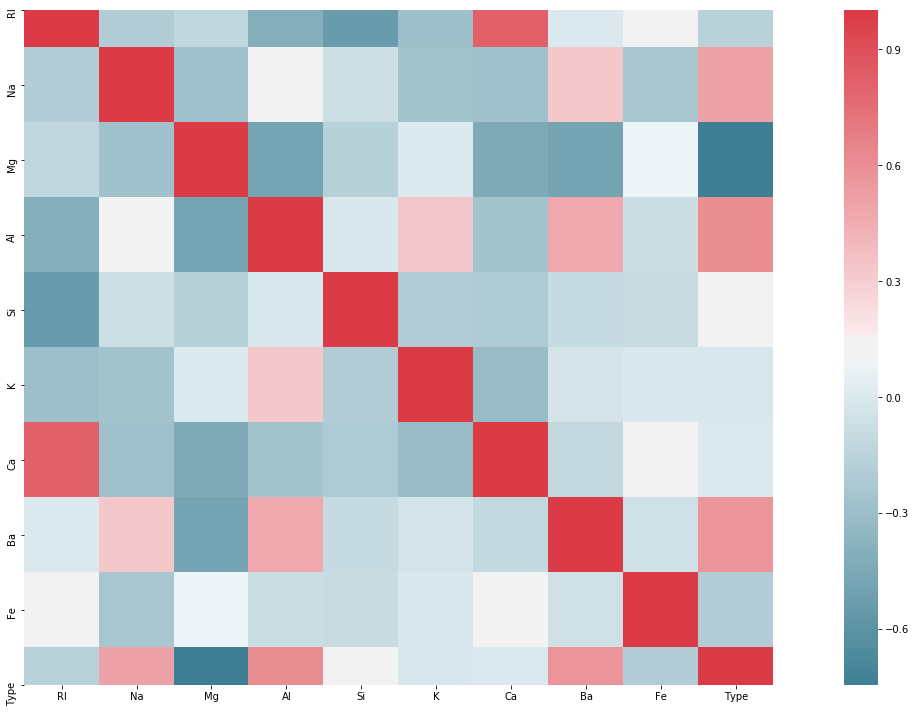

In [139]:
f, ax = plt.subplots(figsize=(20, 10)) # F == Figure | ax = Matriz
corr = df.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

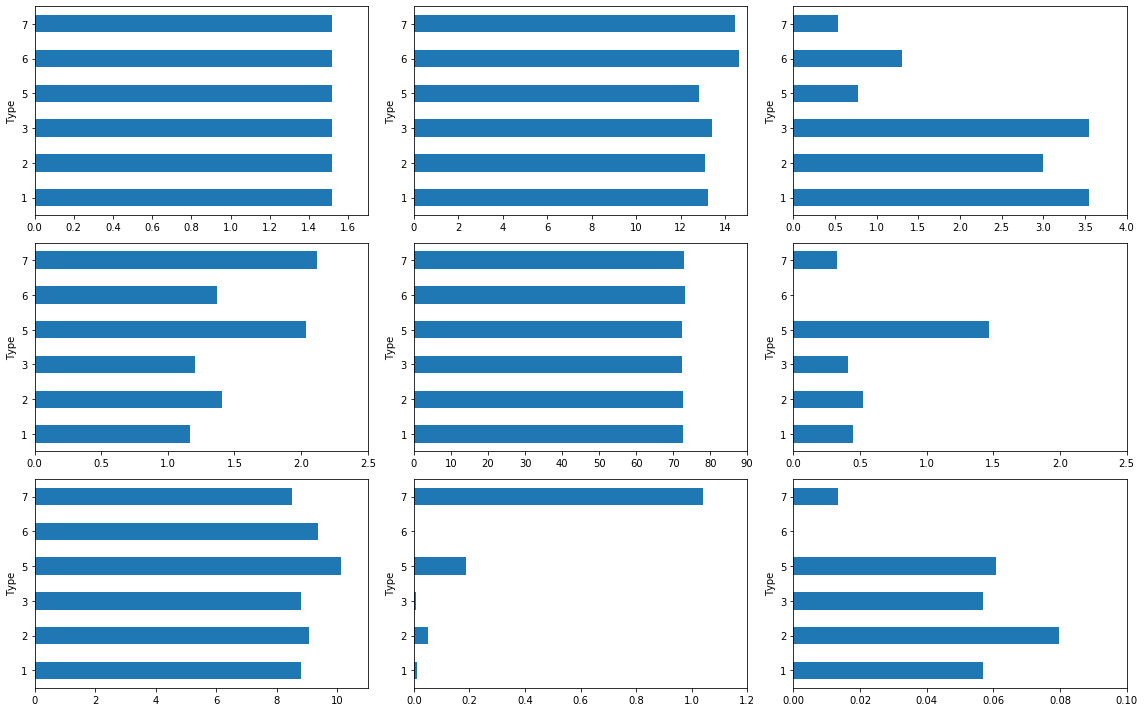

In [140]:
fig, axes= plt.subplots(3, 3, figsize=(16, 10))
df.groupby('Type')['RI'].mean().plot(kind='barh',ax=axes[0,0],xlim=[0,1.7])
df.groupby('Type')['Na'].mean().plot(kind='barh',ax=axes[0,1],xlim=[0,15])
df.groupby('Type')['Mg'].mean().plot(kind='barh',ax=axes[0,2],xlim=[0,4])
df.groupby('Type')['Al'].mean().plot(kind='barh',ax=axes[1,0],xlim=[0,2.5])
df.groupby('Type')['Si'].mean().plot(kind='barh',ax=axes[1,1],xlim=[0,90])
df.groupby('Type')['K'].mean().plot(kind='barh',ax=axes[1,2],xlim=[0,2.5])
df.groupby('Type')['Ca'].mean().plot(kind='barh',ax=axes[2,0],xlim=[0,11])
df.groupby('Type')['Ba'].mean().plot(kind='barh',ax=axes[2,1],xlim=[0,1.2])
df.groupby('Type')['Fe'].mean().plot(kind='barh',ax=axes[2,2],xlim=[0,0.1])

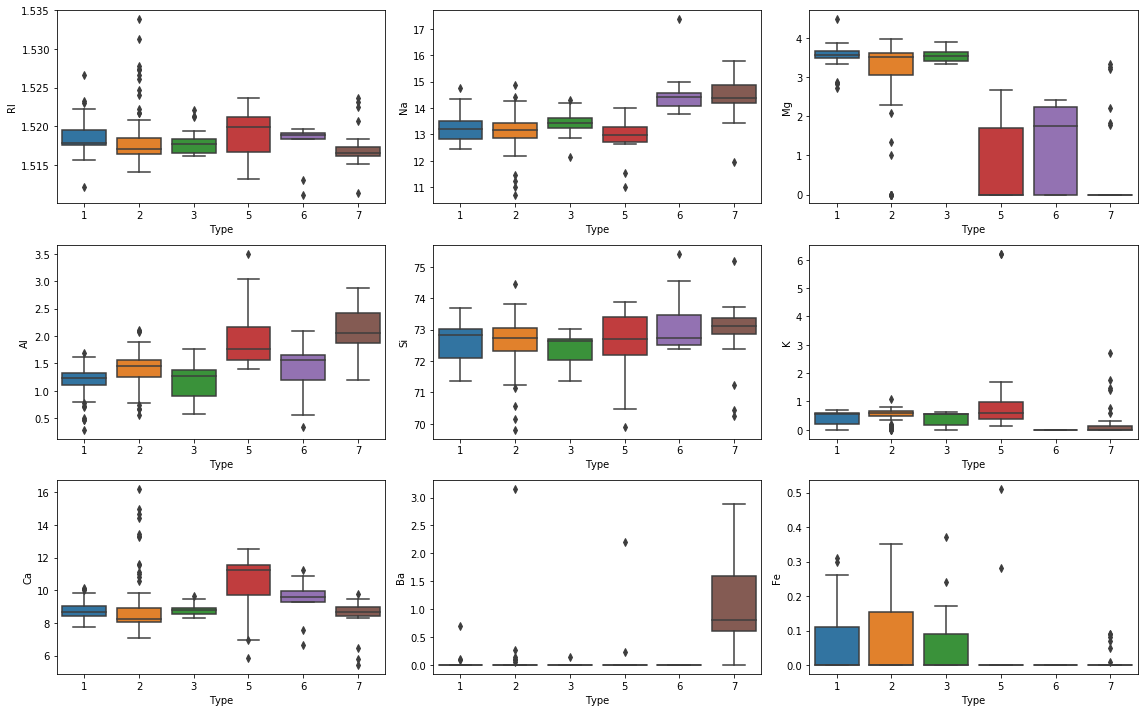

In [141]:
figbi, axes= plt.subplots(3, 3, figsize=(16, 10))
cont = 0
for i in range(3):
    for j in range(3):
        sns.boxplot(x="Type", y=df.columns[cont], data=df,ax=axes[i,j])
        cont += 1

## Data Division

In [166]:
features = df.iloc[:, 0:9]
target = df.iloc[:,9]

In [167]:
features

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

In [168]:
target

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

## Data Normalization

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [170]:
features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

## Applying the model

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [223]:
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size = 0.1)

In [224]:
tree = RandomForestClassifier(n_estimators=10, criterion='entropy') # ML Algorithm - Decision Tree
tree.fit(f_train, t_train) # Training the ML model
print(tree.score(f_test, t_test))

0.8636363636363636
